In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
rooth_path = '../rawdata/proc_data/'
generator_df = pd.read_csv(rooth_path + 'generator_df.csv')
gen_bear_df = pd.read_csv(rooth_path + 'gen_bear_df.csv')
hyd_df = pd.read_csv(rooth_path + 'hyd_df.csv')
gearbox_df = pd.read_csv(rooth_path + 'gearbox_df.csv')
transf_df = pd.read_csv(rooth_path + 'transf_df.csv')

In [3]:
generator_df['Timestamp'] = pd.to_datetime(generator_df['Timestamp'])
gen_bear_df['Timestamp'] = pd.to_datetime(gen_bear_df['Timestamp'])
hyd_df['Timestamp'] = pd.to_datetime(hyd_df['Timestamp'])
gearbox_df['Timestamp'] = pd.to_datetime(gearbox_df['Timestamp'])
transf_df['Timestamp'] = pd.to_datetime(transf_df['Timestamp'])

# Feature Selection

#### Pearson Corr

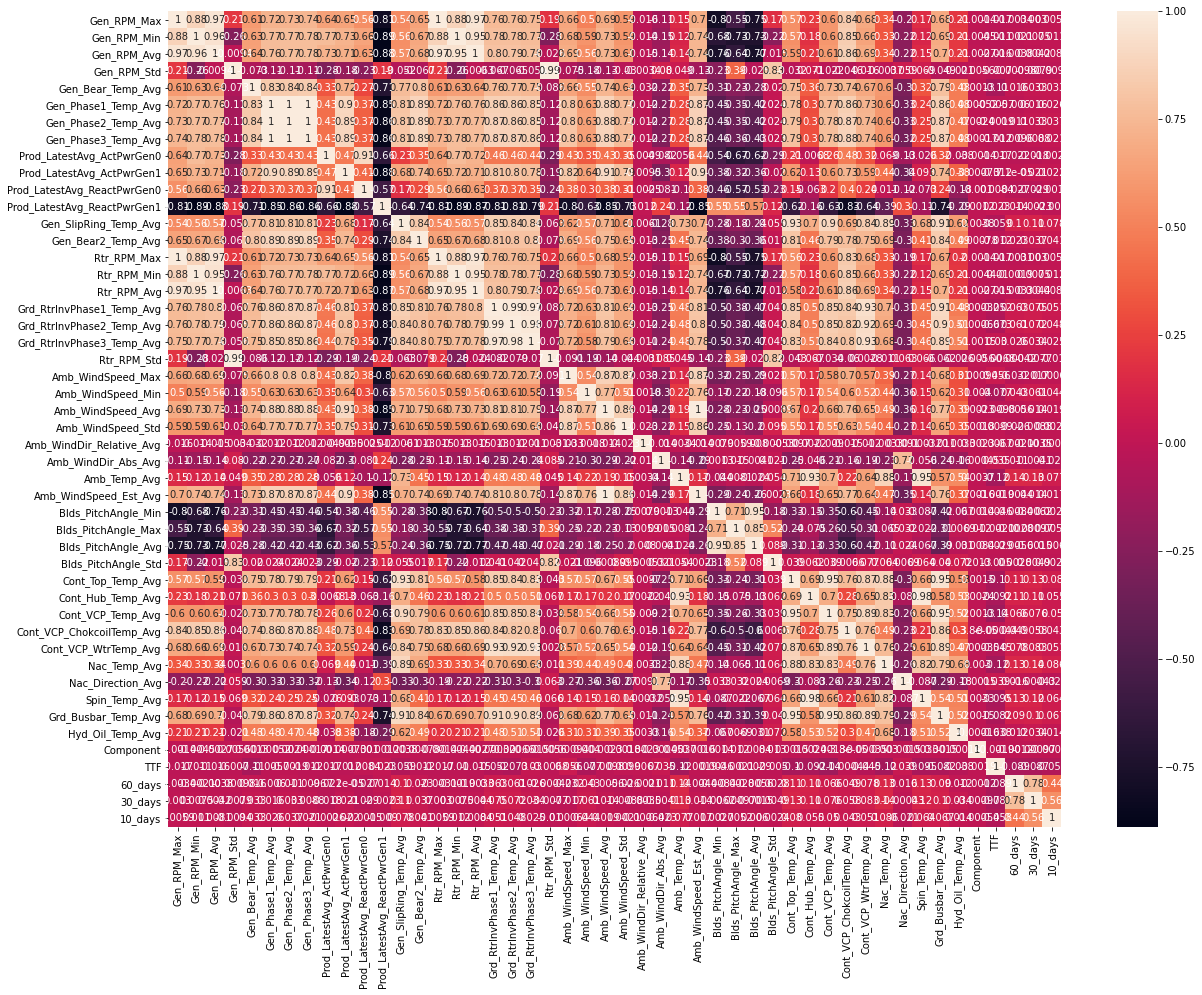

In [4]:
plt.figure(figsize=(20,15))
cor = generator_df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [5]:
gen_features_drop = ['Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_Phase1_Temp_Avg','Gen_Phase3_Temp_Avg', 'Amb_WindSpeed_Est_Avg',
                     'Grd_RtrInvPhase1_Temp_Avg', 'Grd_RtrInvPhase3_Temp_Avg', 'Rtr_RPM_Max', 'Rtr_RPM_Min',
                     'Blds_PitchAngle_Max', 'Blds_PitchAngle_Min', 'Prod_LatestAvg_ReactPwrGen1', 'Cont_Hub_Temp_Avg',
                     'Spin_Temp_Avg', 'Rtr_RPM_Std', 'Rtr_RPM_Avg', 'Cont_VCP_Temp_Avg']

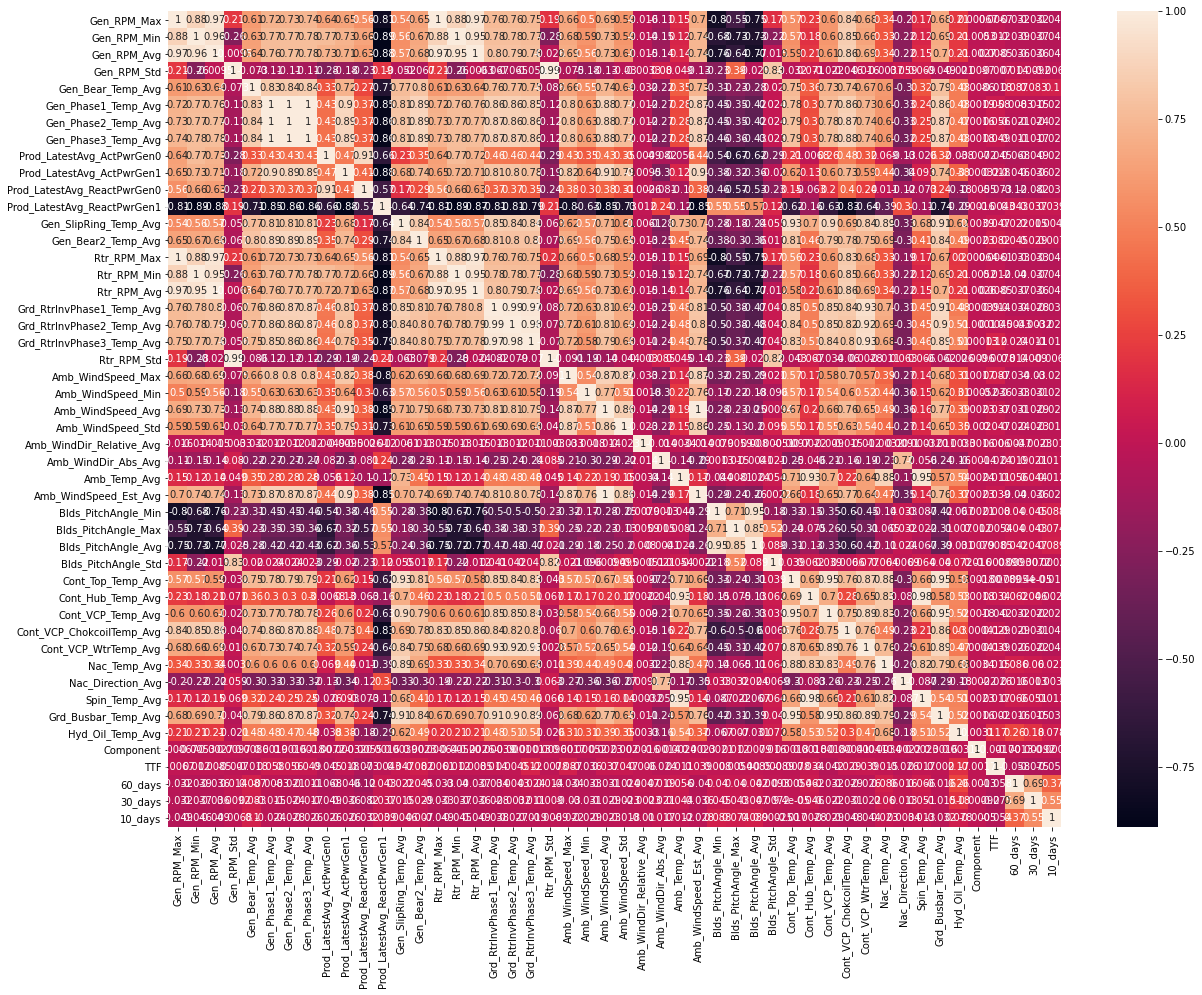

In [6]:
plt.figure(figsize=(20,15))
cor = gen_bear_df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [7]:
gen_bear_features_drop = ['Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_Phase1_Temp_Avg','Gen_Phase3_Temp_Avg', 'Amb_WindSpeed_Est_Avg',
                     'Grd_RtrInvPhase1_Temp_Avg', 'Grd_RtrInvPhase3_Temp_Avg', 'Rtr_RPM_Max', 'Rtr_RPM_Min',
                     'Blds_PitchAngle_Max', 'Blds_PitchAngle_Min', 'Prod_LatestAvg_ReactPwrGen1', 'Cont_Hub_Temp_Avg',
                     'Spin_Temp_Avg', 'Rtr_RPM_Std', 'Rtr_RPM_Avg', 'Cont_VCP_Temp_Avg']

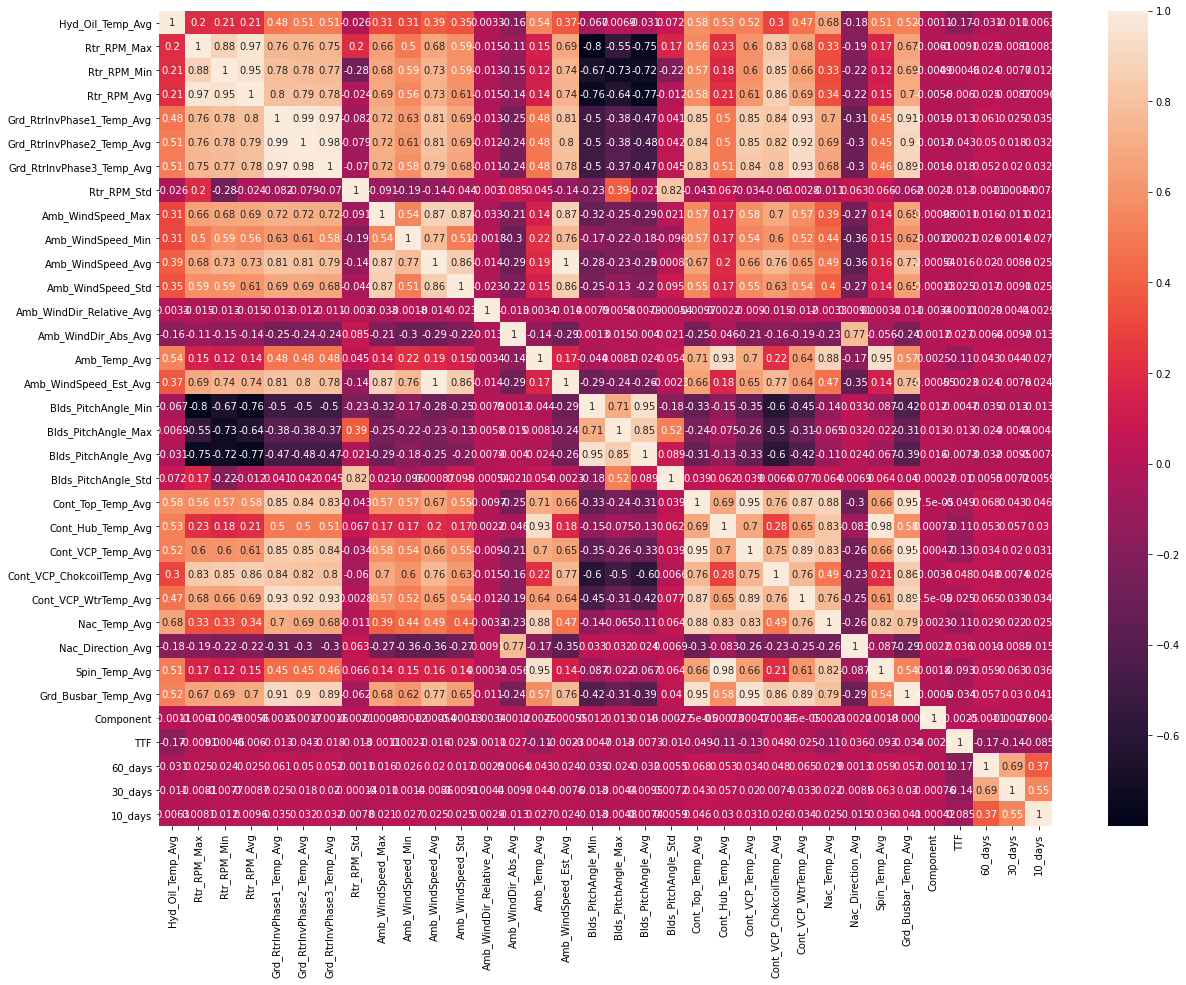

In [8]:
plt.figure(figsize=(20,15))
cor = hyd_df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [9]:
hyd_features_drop = ['Rtr_RPM_Max', 'Rtr_RPM_Min','Blds_PitchAngle_Max', 'Blds_PitchAngle_Min', 
                     'Blds_PitchAngle_Max', 'Grd_RtrInvPhase3_Temp_Avg', 'Grd_Busbar_Temp_Avg', 'Amb_WindSpeed_Est_Avg',
                     'Spin_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Grd_RtrInvPhase1_Temp_Avg', 'Cont_VCP_Temp_Avg']

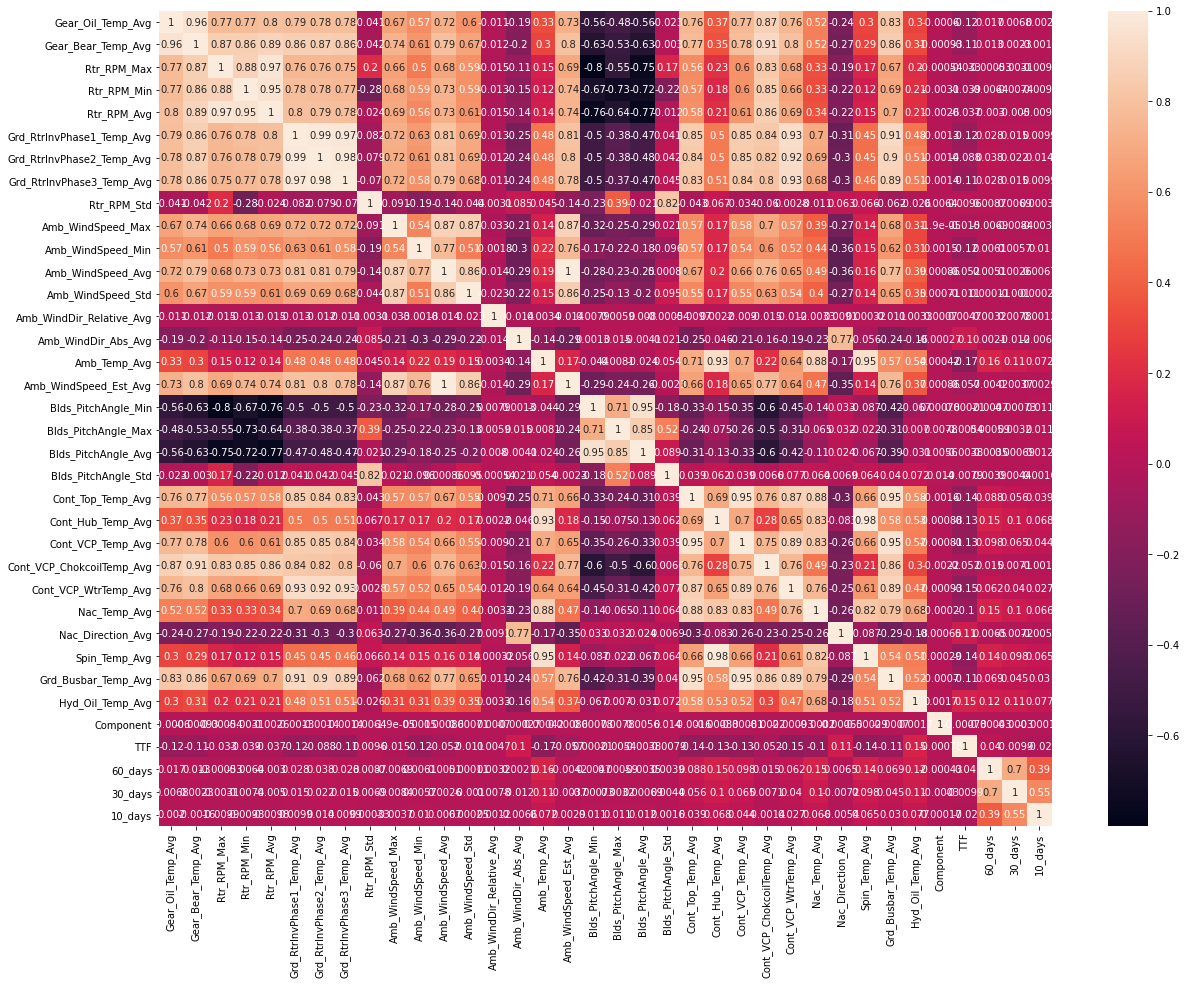

In [10]:
plt.figure(figsize=(20,15))
cor = gearbox_df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [11]:
gearbox_features_drop =['Rtr_RPM_Max', 'Rtr_RPM_Min', 'Grd_RtrInvPhase1_Temp_Avg', 'Grd_RtrInvPhase3_Temp_Avg',
                       'Blds_PitchAngle_Min', 'Blds_PitchAngle_Max', 'Cont_VCP_Temp_Avg', 'Grd_Busbar_Temp_Avg',
                       'Amb_WindSpeed_Est_Avg', 'Spin_Temp_Avg']

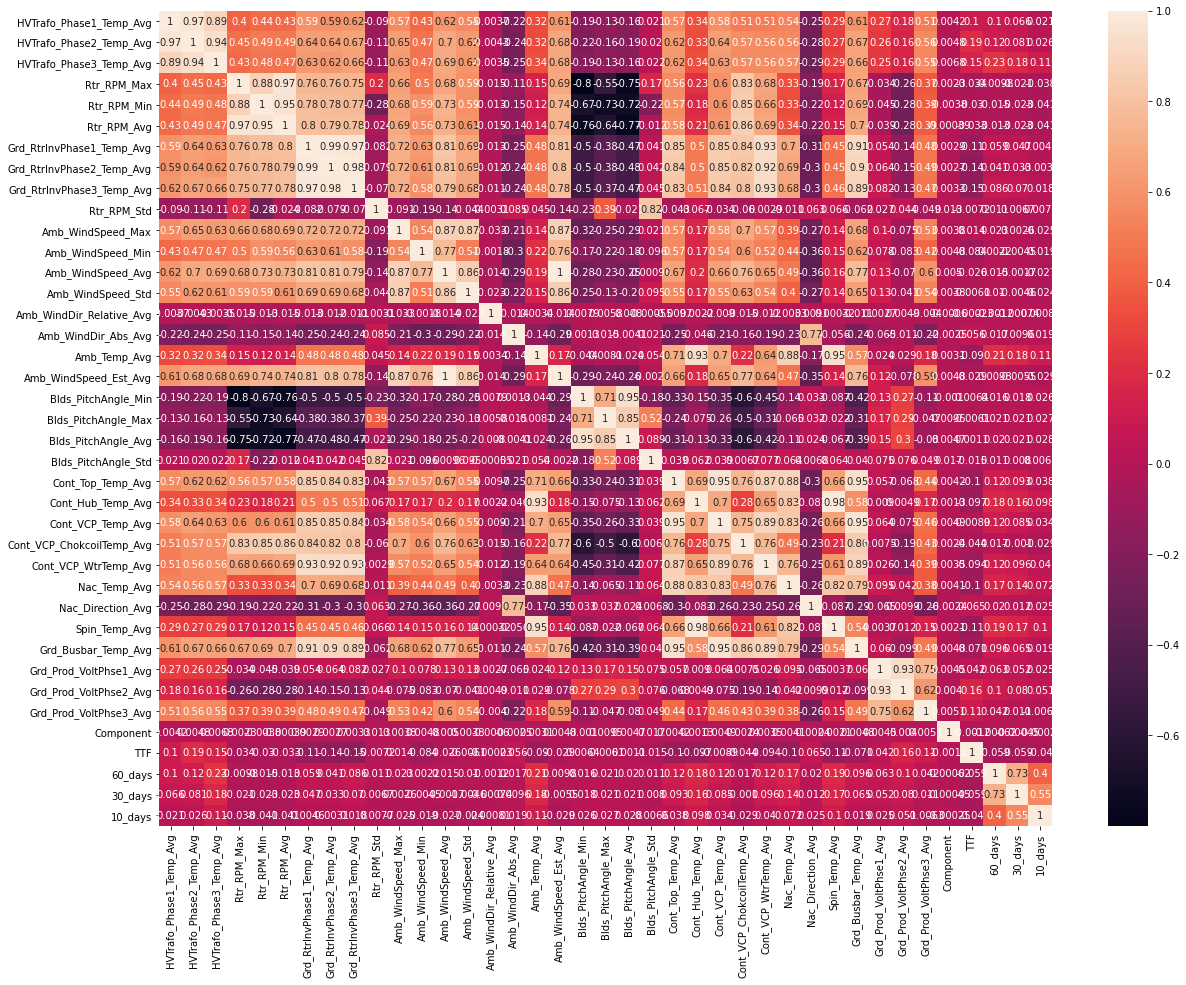

In [12]:
plt.figure(figsize=(20,15))
cor = transf_df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [13]:
transf_features_drop =['HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase3_Temp_Avg', 'Rtr_RPM_Max', 'Rtr_RPM_Min',
                       'Grd_RtrInvPhase1_Temp_Avg', 'Grd_RtrInvPhase3_Temp_Avg', 'Blds_PitchAngle_Min', 'Blds_PitchAngle_Max',
                       'Amb_WindSpeed_Est_Avg', 'Spin_Temp_Avg', 'Cont_VCP_Temp_Avg']

In [14]:
## Remove columns with strong correlations
generator_df = generator_df.drop(columns=gen_features_drop)
gen_bear_df = gen_bear_df.drop(columns=gen_bear_features_drop)
hyd_df = hyd_df.drop(columns=hyd_features_drop)
gearbox_df = gearbox_df.drop(columns=gearbox_features_drop)
transf_df = transf_df.drop(columns=transf_features_drop)

In [15]:
generator_df.shape, gen_bear_df.shape, hyd_df.shape, gearbox_df.shape, transf_df.shape

((434122, 33), (434120, 33), (434120, 25), (434116, 28), (434118, 30))

# Quick Data Exploration

In [16]:
failures_df = pd.read_csv('../rawdata/training/wind-farm-1-failures-training.csv')

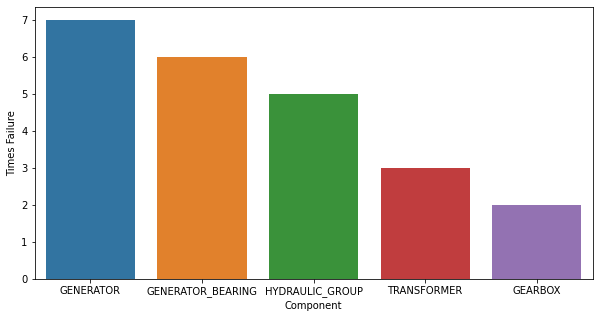

In [17]:
#Number of failures by each component
fig = plt.figure(figsize=(10,5))
nu = failures_df['Component'].value_counts().reset_index()
nu.columns = ['Component','Times Failure']
ax = sns.barplot(x='Component', y='Times Failure', data=nu)

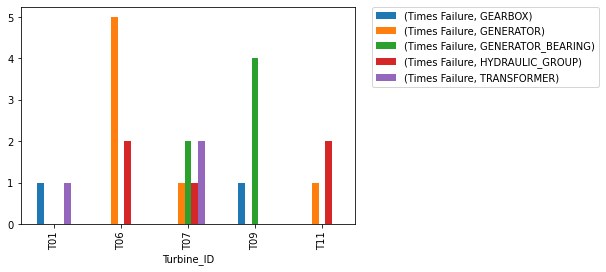

In [18]:
#Failures of components by Turbine
failures_df_by_turbine = failures_df.groupby(['Turbine_ID'])['Component'].value_counts()
failures_df_by_turbine = failures_df_by_turbine.to_frame()
failures_df_by_turbine.columns = ['Times Failure']
fail_turb = failures_df_by_turbine.unstack()
fail_turb.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

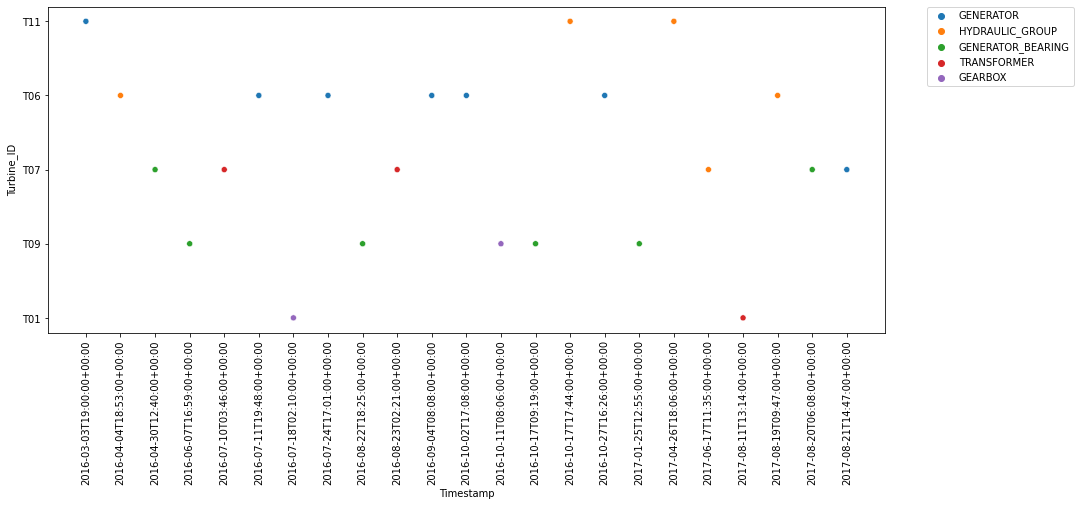

In [19]:
#Failures by component and Turbine across time
fig = plt.figure(figsize=(15,6))
sns.scatterplot(x=failures_df['Timestamp'], y=failures_df['Turbine_ID'], hue=failures_df['Component'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=90)
plt.ylabel('Turbine_ID')
plt.xlabel('Timestamp')
plt.show()

In [20]:
#Failures in Generator Turbine T06
temp = generator_df[generator_df['Turbine_ID']=='T06']

<Figure size 1224x1080 with 0 Axes>

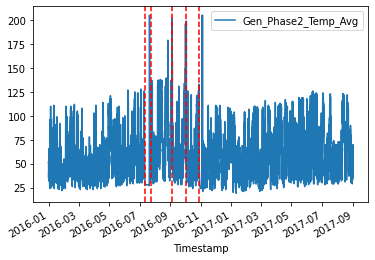

In [21]:
fig = plt.figure(figsize=(17,15))
temp.plot('Timestamp','Gen_Phase2_Temp_Avg')
plt.axvline(x='2016-07-11T19:48:00+00:00', color='red', linestyle= '--')
plt.axvline(x='2016-07-24T17:01:00+00:00', color='red', linestyle= '--')
plt.axvline(x='2016-09-04T08:08:00+00:00', color='red', linestyle= '--')
plt.axvline(x='2016-10-02 17:08:00+00:00', color='red', linestyle= '--')
plt.axvline(x='2016-10-27 16:26:00+00:00', color='red', linestyle= '--')
plt.show()

<Figure size 1440x1440 with 0 Axes>

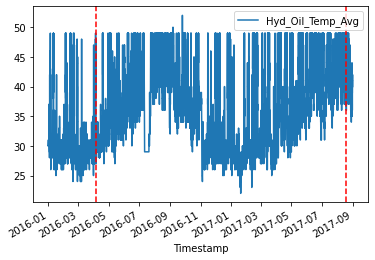

In [22]:
#Failures in Hyd T06
fig = plt.figure(figsize=(20,20))
temp.plot('Timestamp','Hyd_Oil_Temp_Avg')
plt.axvline(x='2016-04-04T18:53:00+00:00', color='red', linestyle= '--')
plt.axvline(x='2017-08-19T09:47:00+00:00', color='red', linestyle= '--')
plt.show()

In [23]:
# Failures Trasnsformer T07
temp1 = transf_df[transf_df['Turbine_ID']=='T07']

<Figure size 1224x1080 with 0 Axes>

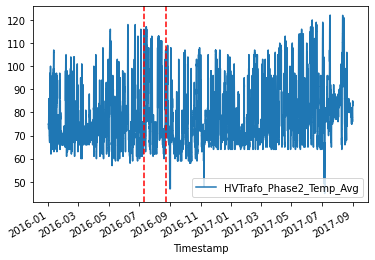

In [24]:
fig = plt.figure(figsize=(17,15))
temp1.plot('Timestamp','HVTrafo_Phase2_Temp_Avg')
plt.axvline(x='2016-07-10T03:46:00+00:00', color='red', linestyle= '--')
plt.axvline(x='2016-08-23T02:21:00+00:00', color='red', linestyle= '--')
plt.show()

<AxesSubplot:xlabel='TTF'>

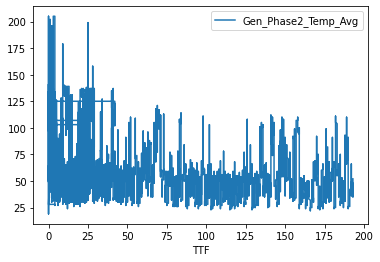

In [27]:
temp.plot('TTF','Gen_Phase2_Temp_Avg')

<AxesSubplot:xlabel='TTF'>

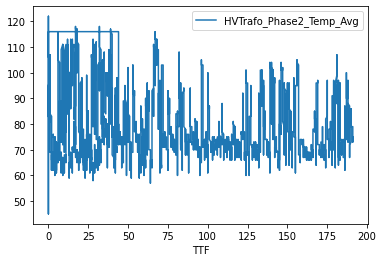

In [28]:
temp1.plot('TTF','HVTrafo_Phase2_Temp_Avg')

# Prepare Train and Test Data

In [25]:
def prepare_train_test(df):
    last_date = df['Timestamp'].iloc[-1]
    split = last_date - pd.DateOffset(months=3)
    df_train = df[df['Timestamp'] < split]
    df_test = df[df['Timestamp'] >= split]
    df_test_t1 = df_test[df_test['Turbine_ID'] == 'T01']
    df_test_t6 = df_test[df_test['Turbine_ID'] == 'T06']
    df_test_t7 = df_test[df_test['Turbine_ID'] == 'T07']
    df_test_t9 = df_test[df_test['Turbine_ID'] == 'T09']
    df_test_t11 = df_test[df_test['Turbine_ID'] == 'T11']
    return df_train, df_test, df_test_t1, df_test_t6, df_test_t7, df_test_t9, df_test_t11

In [26]:
df_train_gen, df_test_gen, df_test_gen_t1, df_test_gen_t6, df_test_gen_t7, df_test_gen_t9, df_test_gen_t11 = prepare_train_test(generator_df)

In [27]:
df_train_gen_bear, df_test_gen_bear, df_test_gen_bear_t1, df_test_gen_bear_t6, df_test_gen_bear_t7, df_test_gen_bear_t9, df_test_gen_bear_t11 = prepare_train_test(gen_bear_df)

In [28]:
df_train_hyd, df_test_hyd, df_test_hyd_t1, df_test_hyd_t6, df_test_hyd_t7, df_test_hyd_t9, df_test_hyd_t11 = prepare_train_test(hyd_df)

In [29]:
df_train_gearbox, df_test_gearbox, df_test_gearbox_t1, df_test_gearbox_t6, df_test_gearbox_t7, df_test_gearbox_t9, df_test_gearbox_t11 = prepare_train_test(gearbox_df)

In [30]:
df_train_transf, df_test_transf, df_test_transf_t1, df_test_transf_t6, df_test_transf_t7, df_test_transf_t9, df_test_transf_t11 = prepare_train_test(transf_df)

In [31]:
dfs = {'df_train_gen': df_train_gen, 'df_test_gen': df_test_gen, 'df_test_gen_t1': df_test_gen_t1, 'df_test_gen_t6': df_test_gen_t6, 
       'df_test_gen_t7': df_test_gen_t7, 'df_test_gen_t9': df_test_gen_t9, 'df_test_gen_t11': df_test_gen_t11,
       'df_train_gen_bear': df_train_gen_bear, 'df_test_gen_bear': df_test_gen_bear, 'df_test_gen_bear_t1': df_test_gen_bear_t1, 
       'df_test_gen_bear_t6': df_test_gen_bear_t6, 'df_test_gen_bear_t7': df_test_gen_bear_t7, 
       'df_test_gen_bear_t9': df_test_gen_bear_t9, 'df_test_gen_bear_t11': df_test_gen_bear_t11,
       'df_train_hyd': df_train_hyd, 'df_test_hyd': df_test_hyd, 'df_test_hyd_t1': df_test_hyd_t1, 'df_test_hyd_t6': df_test_hyd_t6, 
       'df_test_hyd_t7': df_test_hyd_t7, 'df_test_hyd_t9': df_test_hyd_t9, 'df_test_hyd_t11': df_test_hyd_t11,
       'df_train_gearbox': df_train_gearbox, 'df_test_gearbox': df_test_gearbox,  'df_test_gearbox_t1': df_test_gearbox_t1, 
       'df_test_gearbox_t6': df_test_gearbox_t6, 'df_test_gearbox_t7': df_test_gearbox_t7,
       'df_test_gearbox_t9': df_test_gearbox_t9, 'df_test_gearbox_t11': df_test_gearbox_t11,
       'df_train_transf': df_train_transf, 'df_test_transf': df_test_transf, 'df_test_transf_t1': df_test_transf_t1, 'df_test_transf_t6': df_test_transf_t6,
       'df_test_transf_t7': df_test_transf_t7, 'df_test_transf_t9': df_test_transf_t9, 'df_test_transf_t11': df_test_transf_t11}

In [ ]:
for name, df in dfs.items():
    df.to_csv(f'../rawdata/proc_data/{name}.csv', index=False)